# Fractal VR - Behavioral Analysis

Structured notebook

**Logistics**

In [ ]:
# Turn off warnings
defaultW <- getOption("warn") 
options(warn = -1) 
options(warn = defaultW)

# Analysis
library(ez)
citation("ez")
library(emmeans)
citation("emmeans")

# Plotting and formatting
library(cowplot)
library(dplyr)
library(readr) 
library(ggplot2)
library(lmerTest)
library(hrbrthemes)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
# Raincloud plot( from https://github.com/RainCloudPlots/RainCloudPlots):
source('R_rainclouds.R')
library(tidyr)
library(tidyverse)
library(ggthemes)
library(ggpubr)
# Formatting
library(knitr)
library(jtools)
library(apaTables)
# Reliability
library(psych)
library(tidyr)
library(boot)


In [ ]:
# Logistics - directories

root <- '/Volumes/IMS_Drive3/FractalVR/'

tmt_data <- paste0(root, 'data/tmt/')

ratings_data <- paste0(root, 'data/rating.xlsx')

# list of excluded participants: "0DT2", "JGMJ5P", "MX16R1", "VU30R8"

excluded <- c("sub_YG0DT2", "sub_JGMJ5P", "sub_MX16R1", "sub_VU30R8")

subjects = list.files(path = tmt_data, pattern = "sub_", full.names = FALSE)
# print the list of the subjects
# print(subjects)
# count and print number of subjects
n_subjects = length(subjects)
print('Number of subjects:')
print(n_subjects)

# remove excluded subjects
excluded_files = paste0(excluded, "_TMT_behavior.csv")
for (i in 1:length(excluded_files)) {
  subjects = subjects[!grepl(excluded_files[i], subjects)]
}
# print new number of subjects
n_subjects = length(subjects)
print('Number of subjects after removing excluded:')
print(n_subjects)

library(readxl)
# red in the subjective rating
df <- read_excel(ratings_data, col_names = TRUE)

[1] "Number of subjects:"
[1] 40


[1] "Number of subjects after removing excluded:"
[1] 36


New names:
• `` -> `...1`


In [20]:
# Load the TMT data 

tmt_df <- data.frame()

for (i in 1:length(subjects)) {
  # if in excluded list, skip
    if (subjects[i] %in% excluded) {
        next
    }
    # read the data
    file_path <- paste0(tmt_data, subjects[i])
    temp_df <- read.csv(file_path, header = TRUE)
    # add the subject ID only separate _TMT_behavior.csv
    temp_df$subject <- gsub("_TMT_behavior.csv", "", subjects[i])
    #temp_df$subject <- subjects[i]
    # add the condition
    temp_df$condition <- ifelse(grepl("A", subjects[i]), "A", "B")
    # add the data to the main dataframe
    tmt_df <- rbind(tmt_df, temp_df)
}


## Subjective Judgements

1. Clean up. 
2. Diagnostics
3. Plotting

### Results:

Summary Statistics for Subjective Judgements: 

|Dimension     |ImageType |  Mean|    SD|
|:-------------|:---------|-----:|-----:|
|Liking        |L-E       | 46.45| 26.02|
|Liking        |M-E       | 44.48| 29.87|
|Liking        |H-E       | 36.38| 29.53|
|Liking        |L-S       | 38.20| 33.75|
|Liking        |M-S       | 56.05| 34.09|
|Liking        |H-S       | 55.83| 34.04|
|Naturalness   |L-E       | 23.60| 24.32|
|Naturalness   |M-E       | 20.35| 18.37|
|Naturalness   |H-E       | 13.72| 13.39|
|Naturalness   |L-S       | 54.40| 29.56|
|Naturalness   |M-S       | 76.67| 20.95|
|Naturalness   |H-S       | 71.69| 23.04|
|ApproachAvoid |L-E       | 58.33| 30.10|
|ApproachAvoid |M-E       | 55.75| 26.99|
|ApproachAvoid |H-E       | 51.55| 29.05|
|ApproachAvoid |L-S       | 53.85| 33.90|
|ApproachAvoid |M-S       | 70.40| 30.64|
|ApproachAvoid |H-S       | 67.92| 30.48|
|Stress        |L-E       | 37.15| 28.88|
|Stress        |M-E       | 48.58| 32.04|
|Stress        |H-E       | 57.62| 30.36|
|Stress        |L-S       | 39.02| 39.63|
|Stress        |M-S       | 26.85| 32.03|
|Stress        |H-S       | 33.75| 34.26|
|Relaxation    |L-E       | 43.60| 27.61|
|Relaxation    |M-E       | 35.83| 29.02|
|Relaxation    |H-E       | 24.87| 25.34|
|Relaxation    |L-S       | 44.17| 36.02|
|Relaxation    |M-S       | 63.20| 35.80|
|Relaxation    |H-S       | 58.88| 34.71|

In [ ]:
# Rename relevant columns for readability
column_mapping <- c(
  'v_130' = 'A1_Liking', 'v_131' = 'A1_Naturalness', 'v_143' = 'A1_ApproachAvoid', 'v_134' = 'A1_Stress', 'v_135' = 'A1_Relaxation',
  'v_136' = 'A2_Liking', 'v_137' = 'A2_Naturalness', 'v_144' = 'A2_ApproachAvoid', 'v_139' = 'A2_Stress', 'v_140' = 'A2_Relaxation',
  'v_141' = 'A3_Liking', 'v_142' = 'A3_Naturalness', 'v_145' = 'A3_ApproachAvoid', 'v_146' = 'A3_Stress', 'v_147' = 'A3_Relaxation',
  'v_148' = 'B1_Liking', 'v_149' = 'B1_Naturalness', 'v_150' = 'B1_ApproachAvoid', 'v_151' = 'B1_Stress', 'v_152' = 'B1_Relaxation',
  'v_153' = 'B2_Liking', 'v_154' = 'B2_Naturalness', 'v_155' = 'B2_ApproachAvoid', 'v_156' = 'B2_Stress', 'v_157' = 'B2_Relaxation',
  'v_158' = 'B3_Liking', 'v_159' = 'B3_Naturalness', 'v_160' = 'B3_ApproachAvoid', 'v_161' = 'B3_Stress', 'v_162' = 'B3_Relaxation'
)
colnames(df) <- dplyr::recode(colnames(df), !!!column_mapping)

# rename the first column to 'ID'
colnames(df)[1] <- 'ID'
df_data <- df

# Prepare dimensions and image types
dimensions <- c('Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation')
old_labels <- c('A1', 'A2', 'A3', 'B1', 'B2', 'B3')
new_labels <- c('L-E', 'M-E', 'H-E', 'L-S', 'M-S', 'H-S')


# A1 = Low Exact; A2 = Medium Exact; A3 = High Exact
# B1 = Low Similar; B2 = Medium Similar; B3 = High Similar

# Convert it to long format, excluding the ID column
df_long <- df_data %>%
  pivot_longer(
    cols = -ID,  # Exclude the ID column
    names_to = c("ImageType", "Dimension"),
    names_sep = "_"
  ) %>%
  mutate(
    ImageType = factor(ImageType, levels = c("A1", "A2", "A3", "B1", "B2", "B3")),
    Dimension = factor(Dimension, levels = c("Liking", "Naturalness", "ApproachAvoid", "Stress", "Relaxation"))
  )

# Change image type labels
df_long$ImageType <- recode(df_long$ImageType,
                            "A1" = "L-E",
                            "A2" = "M-E",
                            "A3" = "H-E",
                            "B1" = "L-S",
                            "B2" = "M-S",
                            "B3" = "H-S")

# Create variable FD_level: Low, Medium, High
df_long$FD_level <- recode(df_long$ImageType,
                           "L-E" = "Low",
                           "M-E" = "Medium",
                           "H-E" = "High",
                           "L-S" = "Low",
                           "M-S" = "Medium",
                           "H-S" = "High")

# Create variable Fractal_type: Exact, Statistical
df_long$Fractal_type <- recode(df_long$ImageType,
                               "L-E" = "Exact",
                               "M-E" = "Exact",
                               "H-E" = "Exact",
                               "L-S" = "Statistical",
                               "M-S" = "Statistical",
                               "H-S" = "Statistical")

# Print head
head(df_long)




ID,ImageType,Dimension,value,FD_level,Fractal_type
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>
N6FGR8,L-E,Liking,35,Low,Exact
N6FGR8,L-E,Naturalness,27,Low,Exact
N6FGR8,L-E,ApproachAvoid,10,Low,Exact
N6FGR8,L-E,Stress,100,Low,Exact
N6FGR8,L-E,Relaxation,100,Low,Exact
N6FGR8,M-E,Liking,15,Medium,Exact


In [24]:
# flip the value 100 - value for each naturalness, approachavoid and stress

for (i in 1:nrow(df_long)) {
  if (df_long$Dimension[i] == "Naturalness" || df_long$Dimension[i] == "ApproachAvoid" || df_long$Dimension[i] == "Stress") {
    df_long$value[i] <- 100 - df_long$value[i]
  }
}
# Print head
head(df_long)

ID,ImageType,Dimension,value,FD_level,Fractal_type
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>
N6FGR8,L-E,Liking,35,Low,Exact
N6FGR8,L-E,Naturalness,73,Low,Exact
N6FGR8,L-E,ApproachAvoid,90,Low,Exact
N6FGR8,L-E,Stress,0,Low,Exact
N6FGR8,L-E,Relaxation,100,Low,Exact
N6FGR8,M-E,Liking,15,Medium,Exact


In [122]:
# remove excluded subjects

excluded <- c("0DT2", "JGMJ5P", "MX16R1", "VU30R8")


for (i in 1:length(excluded)) {
  df_long <- df_long[!grepl(excluded[i], df_long$ID), ]
}

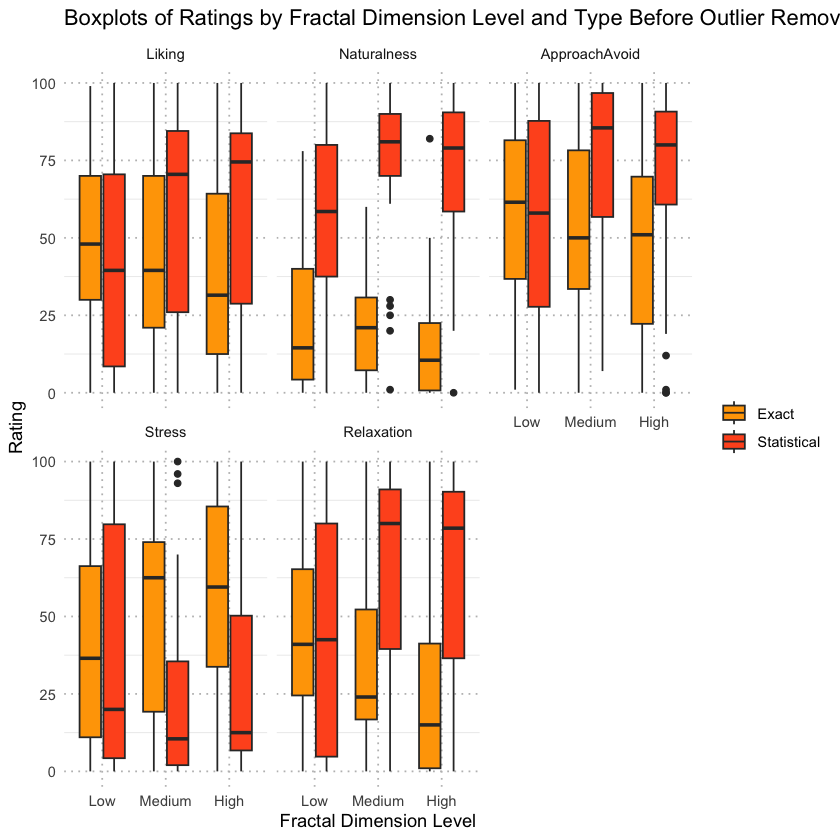

In [123]:
# create boxplot value ~ FD_level x Fractal_type wrap by Dimension

ggplot(df_long, aes(x = FD_level, y = value, fill = Fractal_type)) +
  geom_boxplot() +
  facet_wrap(~ Dimension) +
  scale_fill_manual(values = c('orange', '#ff5722')) +
  labs(
    x = "Fractal Dimension Level",
    y = "Rating",
    title = "Boxplots of Ratings by Fractal Dimension Level and Type Before Outlier Removal",
  ) +
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    panel.grid.major = element_line(color = "gray", linetype = "dotted")
  )

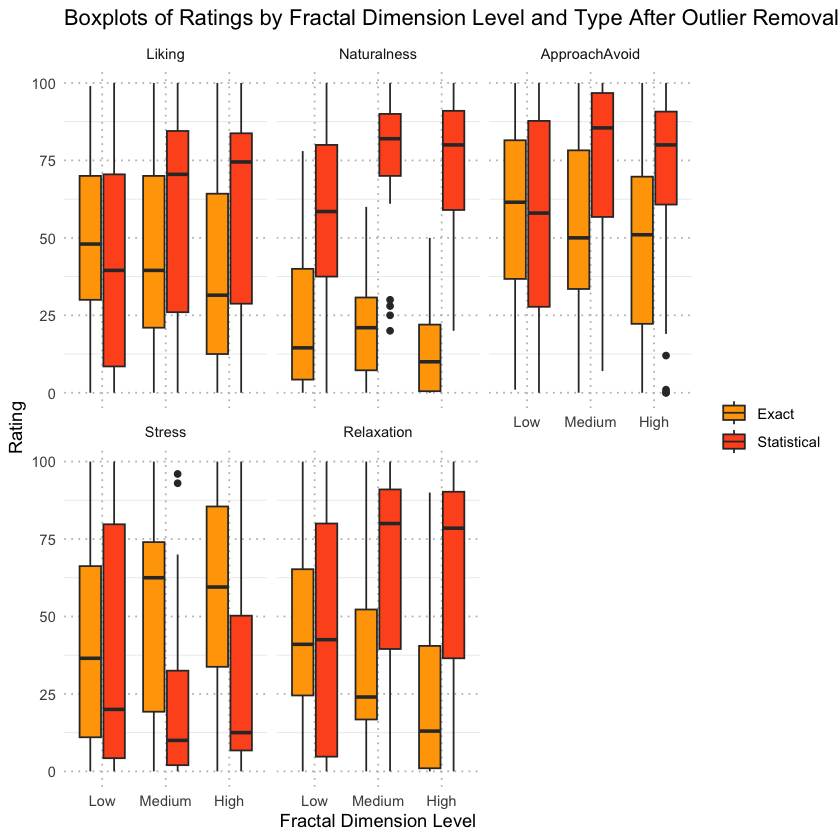

In [124]:
# remove outliers for each scale 2.5 SD
# Create a function to remove outliers

remove_outliers <- function(data, threshold = 2.5) {
  data %>%
    group_by(Dimension, ImageType) %>%
    mutate(
      mean_value = mean(value, na.rm = TRUE),
      sd_value = sd(value, na.rm = TRUE),
      z_score = (value - mean_value) / sd_value
    ) %>%
    filter(abs(z_score) <= threshold) %>%
    select(-mean_value, -sd_value, -z_score)
}
# Apply the function to the data
df_long_no_outliers <- remove_outliers(df_long, threshold = 2.5)

# Plot the data after outlier removal
ggplot(df_long_no_outliers, aes(x = FD_level, y = value, fill = Fractal_type)) +
  geom_boxplot() +
  facet_wrap(~ Dimension) +
  scale_fill_manual(values = c('orange', '#ff5722')) +
  labs(
    x = "Fractal Dimension Level",
    y = "Rating",
    title = "Boxplots of Ratings by Fractal Dimension Level and Type After Outlier Removal",
  ) +
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    panel.grid.major = element_line(color = "gray", linetype = "dotted")
  )

**Summary Statistics**

In [133]:
# Create table with means and SDs for each dimension

df_long_no_outliers %>%
  group_by(Dimension, ImageType) %>%
  summarise(
    mean_value = mean(value, na.rm = TRUE),
    sd_value = sd(value, na.rm = TRUE)
  ) %>%
  ungroup() %>%
  arrange(Dimension, ImageType) %>%
  mutate(
    mean_value = round(mean_value, 2),
    sd_value = round(sd_value, 2)
  ) %>%
  rename(
    Dimension = Dimension,
    ImageType = ImageType,
    Mean = mean_value,
    SD = sd_value
  ) -> summary_table

# Print the summary table
knitr::kable(summary_table, format = "markdown")


# count occurances of naturalness in imagetype

df_long_no_outliers %>%
  group_by(ImageType) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) -> count_table

# Print the count table
knitr::kable(count_table, format = "markdown")


`summarise()` has grouped output by 'Dimension'. You can override using the
`.groups` argument.




|Dimension     |ImageType |  Mean|    SD|
|:-------------|:---------|-----:|-----:|
|Liking        |L-E       | 47.72| 26.68|
|Liking        |M-E       | 45.78| 30.38|
|Liking        |H-E       | 37.64| 30.48|
|Liking        |L-S       | 40.22| 34.13|
|Liking        |M-S       | 57.53| 33.69|
|Liking        |H-S       | 58.14| 34.04|
|Naturalness   |L-E       | 23.44| 23.28|
|Naturalness   |M-E       | 22.33| 18.28|
|Naturalness   |H-E       | 14.37| 13.70|
|Naturalness   |L-S       | 55.75| 29.28|
|Naturalness   |M-S       | 77.20| 21.92|
|Naturalness   |H-S       | 73.00| 23.10|
|ApproachAvoid |L-E       | 57.56| 31.18|
|ApproachAvoid |M-E       | 54.31| 27.49|
|ApproachAvoid |H-E       | 49.61| 29.27|
|ApproachAvoid |L-S       | 54.56| 34.04|
|ApproachAvoid |M-S       | 72.11| 29.79|
|ApproachAvoid |H-S       | 68.00| 31.50|
|Stress        |L-E       | 37.42| 29.20|
|Stress        |M-E       | 49.19| 32.27|
|Stress        |H-E       | 56.67| 31.60|
|Stress        |L-S       | 38.2



|ImageType | count|
|:---------|-----:|
|L-E       |   180|
|M-E       |   180|
|L-S       |   180|
|H-S       |   179|
|H-E       |   178|
|M-S       |   178|

**Reliability Analysis**


`df_long_no_outliers`

**Subjective Judgements**

01 liking

In [134]:
# unique IDs in df_long_no_outliers
unique_ids <- unique(df_long_no_outliers$ID)
# Print the number of unique IDs
n_unique_ids <- length(unique_ids)
print('Number of unique IDs:')
n_unique_ids

unique_ids

[1] "Number of unique IDs:"


[1] 36

[1] "N6FGR8" "Z2CN1H" "AAU5L2" "Y6WJKG" "1L9FCD" "KQT35L" "V4JN59" "VVXYJ5"
 [9] "E3R3C1" "FA5FCX" "KWCTKJ" "PVAA50" "RJ70HQ" "0FJ87G" "MNQJJL" "GH9FPG"
[17] "5Z6HUD" "J3R7L4" "Y98JOU" "6AAVN4" "CNYTQ6" "F3N17K" "RQGUR7" "MARMAA"
[25] "4VP5UW" "V3MK4V" "VM3K4U" "MPN87Y" "1LCED7" "XRDKL8" "VJRPUP" "86L56R"
[33] "FX4L2F" "X37HQQ" "GE00WM" "JREJ7A"

In [135]:
# Repeated measures Anova on Liking

print("Repeated measures Anova on Liking")
# Create a new dataframe for Liking
df_liking <- df_long %>%
  filter(Dimension == "Liking") %>%
  select(-Dimension)
# Convert FD_level and Fractal_type to factors
df_liking$FD_level <- factor(df_liking$FD_level, levels = c("Low", "Medium", "High"))
df_liking$Fractal_type <- factor(df_liking$Fractal_type, levels = c("Exact", "Statistical"))

# Run the repeated measures ANOVA
anova_liking <- ezANOVA(
  data = df_liking,
  dv = value,
  wid = ID,
  within = .(FD_level, Fractal_type),
  detailed = TRUE
)
# Print the ANOVA results
anova_liking
# post hoc pairwise comparisons

print("Repeated measures Anova on Naturalness")
# Repeated measures Anova on Naturalness
# Create a new dataframe for Naturalness
df_naturalness <- df_long %>%
  filter(Dimension == "Naturalness") %>%
  select(-Dimension)
# Convert FD_level and Fractal_type to factors
df_naturalness$FD_level <- factor(df_naturalness$FD_level, levels = c("Low", "Medium", "High"))
df_naturalness$Fractal_type <- factor(df_naturalness$Fractal_type, levels = c("Exact", "Statistical"))

# complete_ids <- df_naturalness %>%
#   group_by(ID) %>%
#   summarise(n = n()) %>%
#   filter(n == 6) %>%
#   pull(ID)
# # Filter the dataframe to include only complete IDs
# df_naturalness <- df_naturalness %>%
#   filter(ID %in% complete_ids)
# # Convert ID to a factor
df_naturalness$ID <- factor(df_naturalness$ID)  

# Run the repeated measures ANOVA
anova_naturalness <- ezANOVA(
  data = df_naturalness,
  dv = value,
  wid = ID,
  within = .(FD_level, Fractal_type),
  detailed = TRUE
)
# Print the ANOVA results
anova_naturalness
# post hoc pairwise comparisons

print("Repeated measures Anova on ApproachAvoid")
# Repeated measures Anova on ApproachAvoid
# Create a new dataframe for ApproachAvoid
df_approachavoid <- df_long %>%
  filter(Dimension == "ApproachAvoid") %>%
  select(-Dimension)
# Convert FD_level and Fractal_type to factors
df_approachavoid$FD_level <- factor(df_approachavoid$FD_level, levels = c("Low", "Medium", "High"))
df_approachavoid$Fractal_type <- factor(df_approachavoid$Fractal_type, levels = c("Exact", "Statistical"))
# Run the repeated measures ANOVA
anova_approachavoid <- ezANOVA(
  data = df_approachavoid,
  dv = value,
  wid = ID,
  within = .(FD_level, Fractal_type),
  detailed = TRUE
)
# Print the ANOVA results
anova_approachavoid
# post hoc pairwise comparisons


print("Repeated measures Anova on Stress")
# Repeated measures Anova on Stress
# Create a new dataframe for Stress
df_stress <- df_long %>%
  filter(Dimension == "Stress") %>%
  select(-Dimension)
# Convert FD_level and Fractal_type to factors
df_stress$FD_level <- factor(df_stress$FD_level, levels = c("Low", "Medium", "High"))
df_stress$Fractal_type <- factor(df_stress$Fractal_type, levels = c("Exact", "Statistical"))
# Run the repeated measures ANOVA
anova_stress <- ezANOVA(
  data = df_stress,
  dv = value,
  wid = ID,
  within = .(FD_level, Fractal_type),
  detailed = TRUE
)
# Print the ANOVA results
anova_stress
# post hoc pairwise comparisons

print("Repeated measures Anova on Relaxation")
# Repeated measures Anova on Relaxation
# Create a new dataframe for Relaxation
df_relaxation <- df_long %>%
  filter(Dimension == "Relaxation") %>%
  select(-Dimension)
# Convert FD_level and Fractal_type to factors
df_relaxation$FD_level <- factor(df_relaxation$FD_level, levels = c("Low", "Medium", "High"))
df_relaxation$Fractal_type <- factor(df_relaxation$Fractal_type, levels = c("Exact", "Statistical"))

# complete_ids <- df_relaxation %>%
#   group_by(ID) %>%
#   summarise(n = n()) %>%
#   filter(n == 6) %>%
#   pull(ID)
# # Filter the dataframe to include only complete IDs
# df_relaxation <- df_relaxation %>%
#   filter(ID %in% complete_ids)
# # Convert ID to a factor
# df_relaxation$ID <- factor(df_relaxation$ID)  

# Run the repeated measures ANOVA
anova_relaxation <- ezANOVA(
  data = df_relaxation,
  dv = value,
  wid = ID,
  within = .(FD_level, Fractal_type),
  detailed = TRUE
)
# Print the ANOVA results
anova_relaxation
# post hoc pairwise comparisons




[1] "Repeated measures Anova on Liking"


Warning message:
“Converting "ID" to factor for ANOVA.”


$ANOVA
                 Effect DFn DFd        SSn      SSd          F            p
1           (Intercept)   1  35 494309.671 53256.16 324.860783 2.732773e-19
2              FD_level   2  70   2123.954 36903.71   2.014388 1.410625e-01
3          Fractal_type   1  35   3675.375 94567.12   1.360284 2.513743e-01
4 FD_level:Fractal_type   2  70   7386.750 26048.25   9.925283 1.603994e-04
  p<.05         ges
1     * 0.701064023
2       0.009976335
3       0.017138560
4     * 0.033859013

$`Mauchly's Test for Sphericity`
                 Effect         W           p p<.05
2              FD_level 0.7670157 0.011007092     *
4 FD_level:Fractal_type 0.7481601 0.007209538     *

$`Sphericity Corrections`
                 Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF]
2              FD_level 0.8110404 0.1508999959           0.8447936 0.1491594867
4 FD_level:Fractal_type 0.7988242 0.0005398117         * 0.8310095 0.0004442843
  p[HF]<.05
2          
4         *

[1] "Repeated measures Anova on Naturalness"


$ANOVA
                 Effect DFn DFd        SSn      SSd          F            p
1           (Intercept)   1  35 417648.167 30273.83 482.848857 4.610958e-22
2              FD_level   2  70   3002.528 23245.47   4.520815 1.423887e-02
3          Fractal_type   1  35 117226.963 43898.37  93.464602 2.037310e-11
4 FD_level:Fractal_type   2  70   5546.231 19382.44  10.015155 1.495633e-04
  p<.05        ges
1     * 0.78145666
2     * 0.02506228
3     * 0.50091197
4     * 0.04533222

$`Mauchly's Test for Sphericity`
                 Effect         W          p p<.05
2              FD_level 0.7939596 0.01979578     *
4 FD_level:Fractal_type 0.9022750 0.17408520      

$`Sphericity Corrections`
                 Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF]
2              FD_level 0.8291596 0.0203722752         * 0.8652757 0.0188839371
4 FD_level:Fractal_type 0.9109750 0.0002570663         * 0.9583173 0.0001926942
  p[HF]<.05
2         *
4         *

[1] "Repeated measures Anova on ApproachAvoid"


Warning message:
“Converting "ID" to factor for ANOVA.”


$ANOVA
                 Effect DFn DFd        SSn      SSd          F            p
1           (Intercept)   1  35 761009.449 48422.38 550.062355 5.427610e-23
2              FD_level   2  70   1874.620 27102.05   2.420914 9.624497e-02
3          Fractal_type   1  35   6611.227 79291.27   2.918265 9.643797e-02
4 FD_level:Fractal_type   2  70   5344.176 41977.82   4.455833 1.508305e-02
  p<.05         ges
1     * 0.794536525
2       0.009435938
3       0.032502814
4     * 0.026438293

$`Mauchly's Test for Sphericity`
                 Effect         W           p p<.05
2              FD_level 0.7637165 0.010229334     *
4 FD_level:Fractal_type 0.7255500 0.004279031     *

$`Sphericity Corrections`
                 Effect       GGe      p[GG] p[GG]<.05       HFe      p[HF]
2              FD_level 0.8088760 0.10831104           0.8423500 0.10612611
4 FD_level:Fractal_type 0.7846522 0.02345588         * 0.8150438 0.02203605
  p[HF]<.05
2          
4         *

[1] "Repeated measures Anova on Stress"


Warning message:
“Converting "ID" to factor for ANOVA.”


$ANOVA
                 Effect DFn DFd        SSn      SSd          F            p
1           (Intercept)   1  35 334176.000 69674.00 167.869794 6.462456e-15
2              FD_level   2  70   1845.194 38170.81   1.691916 1.916098e-01
3          Fractal_type   1  35  15335.185 78472.15   6.839770 1.306566e-02
4 FD_level:Fractal_type   2  70   8493.787 39780.88   7.473001 1.144006e-03
  p<.05         ges
1     * 0.596451200
2       0.008094981
3     * 0.063517349
4     * 0.036206694

$`Mauchly's Test for Sphericity`
                 Effect         W           p p<.05
2              FD_level 0.7344741 0.005267453     *
4 FD_level:Fractal_type 0.8673944 0.089059995      

$`Sphericity Corrections`
                 Effect       GGe       p[GG] p[GG]<.05       HFe       p[HF]
2              FD_level 0.7901854 0.198119811           0.8212740 0.197268055
4 FD_level:Fractal_type 0.8829199 0.001883127         * 0.9263094 0.001565124
  p[HF]<.05
2          
4         *

[1] "Repeated measures Anova on Relaxation"


Warning message:
“Converting "ID" to factor for ANOVA.”


$ANOVA
                 Effect DFn DFd        SSn      SSd          F            p
1           (Intercept)   1  35 464260.167 50064.83 324.561269 2.773002e-19
2              FD_level   2  70   1524.778 31266.22   1.706865 1.888975e-01
3          Fractal_type   1  35  27202.667 85929.67  11.079914 2.062970e-03
4 FD_level:Fractal_type   2  70  12357.333 46966.33   9.208866 2.815487e-04
  p<.05         ges
1     * 0.684257789
2       0.007067276
3     * 0.112673230
4     * 0.054537444

$`Mauchly's Test for Sphericity`
                 Effect         W          p p<.05
2              FD_level 0.8592539 0.07586926      
4 FD_level:Fractal_type 0.9769495 0.67270758      

$`Sphericity Corrections`
                 Effect       GGe        p[GG] p[GG]<.05      HFe        p[HF]
2              FD_level 0.8766193 0.1930734664           0.919136 0.1916838498
4 FD_level:Fractal_type 0.9774689 0.0003187132         * 1.034614 0.0002815487
  p[HF]<.05
2          
4         *

In [136]:
# Run the repeated measures ANOVA using aov
anova_liking <- aov(value ~ FD_level * Fractal_type + Error(ID/(FD_level * Fractal_type)), data = df_liking)
# Perform post hoc pairwise comparisons using Tukey's method
library(emmeans)
# Generate estimated marginal means
emmeans_liking <- emmeans(anova_liking, ~ FD_level * Fractal_type)
# Perform pairwise comparisons
pairwise_results <- pairs(emmeans_liking, adjust = "tukey")
pairwise_results
# Print the pairwise com


# Run the repeated measures ANOVA using aov
anova_naturalness <- aov(value ~ FD_level * Fractal_type + Error(ID/(FD_level * Fractal_type)), data = df_naturalness)
# Generate estimated marginal means
emmeans_naturalness <- emmeans(anova_naturalness, ~ FD_level * Fractal_type)
# Print the pairwise comparisons
# Perform post hoc pairwise comparisons using Tukey's method
pairwise_results_naturalness <- pairs(emmeans_naturalness, adjust = "tukey")
pairwise_results_naturalness


# Run the repeated measures ANOVA using aov
anova_approachavoid <- aov(value ~ FD_level * Fractal_type + Error(ID/(FD_level * Fractal_type)), data = df_approachavoid)
# Generate estimated marginal means
emmeans_approachavoid <- emmeans(anova_approachavoid, ~ FD_level * Fractal_type)
# Print the pairwise comparisons
# Perform post hoc pairwise comparisons using Tukey's method
pairwise_results_approachavoid <- pairs(emmeans_approachavoid, adjust = "tukey")
pairwise_results_approachavoid


# Run the repeated measures ANOVA using aov
anova_stress <- aov(value ~ FD_level * Fractal_type + Error(ID/(FD_level * Fractal_type)), data = df_stress)
# Generate estimated marginal means
emmeans_stress <- emmeans(anova_stress, ~ FD_level * Fractal_type)
# Print the pairwise comparisons
# Perform post hoc pairwise comparisons using Tukey's method
pairwise_results_stress <- pairs(emmeans_stress, adjust = "tukey")
pairwise_results_stress
 

# Run the repeated measures ANOVA using aov
anova_relaxation <- aov(value ~ FD_level * Fractal_type + Error(ID/(FD_level * Fractal_type)), data = df_relaxation)
# Generate estimated marginal means
emmeans_relaxation <- emmeans(anova_relaxation, ~ FD_level * Fractal_type)
# Print the pairwise comparisons
# Perform post hoc pairwise comparisons using Tukey's method
pairwise_results_relaxation <- pairs(emmeans_relaxation, adjust = "tukey")
pairwise_results_relaxation



# print the significant results
# Print the significant results
significant_results_liking <- summary(pairwise_results)[summary(pairwise_results)$p.value < 0.05, ]
significant_results_naturalness <- summary(pairwise_results_naturalness)[summary(pairwise_results_naturalness)$p.value < 0.05, ]
significant_results_approachavoid <- summary(pairwise_results_approachavoid)[summary(pairwise_results_approachavoid)$p.value < 0.05, ]
significant_results_stress <- summary(pairwise_results_stress)[summary(pairwise_results_stress)$p.value < 0.05, ]
significant_results_relaxation <- summary(pairwise_results_relaxation)[summary(pairwise_results_relaxation)$p.value < 0.05, ]
# Print the significant results



Note: re-fitting model with sum-to-zero contrasts



 contrast                              estimate   SE    df t.ratio p.value
 Low Exact - Medium Exact                 1.944 5.00 136.0   0.389  0.9988
 Low Exact - High Exact                  10.083 5.00 136.0   2.017  0.3379
 Low Exact - Low Statistical              7.500 7.99  54.9   0.939  0.9346
 Low Exact - Medium Statistical          -9.806 8.25  62.1  -1.188  0.8409
 Low Exact - High Statistical           -10.417 8.25  62.1  -1.262  0.8041
 Medium Exact - High Exact                8.139 5.00 136.0   1.628  0.5813
 Medium Exact - Low Statistical           5.556 8.25  62.1   0.673  0.9843
 Medium Exact - Medium Statistical      -11.750 7.99  54.9  -1.471  0.6839
 Medium Exact - High Statistical        -12.361 8.25  62.1  -1.498  0.6670
 High Exact - Low Statistical            -2.583 8.25  62.1  -0.313  0.9996
 High Exact - Medium Statistical        -19.889 8.25  62.1  -2.410  0.1689
 High Exact - High Statistical          -20.500 7.99  54.9  -2.566  0.1233
 Low Statistical - Medium

Note: re-fitting model with sum-to-zero contrasts



 contrast                              estimate   SE    df t.ratio p.value
 Low Exact - Medium Exact                  1.11 4.11 138.9   0.270  0.9998
 Low Exact - High Exact                    7.19 4.11 138.9   1.749  0.5019
 Low Exact - Low Statistical             -32.31 5.79  66.3  -5.583  <.0001
 Low Exact - Medium Statistical          -51.64 5.92  73.3  -8.727  <.0001
 Low Exact - High Statistical            -47.53 5.92  73.3  -8.032  <.0001
 Medium Exact - High Exact                 6.08 4.11 138.9   1.479  0.6781
 Medium Exact - Low Statistical          -33.42 5.92  73.3  -5.647  <.0001
 Medium Exact - Medium Statistical       -52.75 5.79  66.3  -9.116  <.0001
 Medium Exact - High Statistical         -48.64 5.92  73.3  -8.220  <.0001
 High Exact - Low Statistical            -39.50 5.92  73.3  -6.675  <.0001
 High Exact - Medium Statistical         -58.83 5.92  73.3  -9.943  <.0001
 High Exact - High Statistical           -54.72 5.79  66.3  -9.457  <.0001
 Low Statistical - Medium

Note: re-fitting model with sum-to-zero contrasts



 contrast                              estimate   SE    df t.ratio p.value
 Low Exact - Medium Exact                  3.25 5.24 133.8   0.621  0.9893
 Low Exact - High Exact                    7.94 5.24 133.8   1.517  0.6538
 Low Exact - Low Statistical               3.00 8.01  71.8   0.375  0.9990
 Low Exact - Medium Statistical          -14.56 7.63  64.8  -1.907  0.4074
 Low Exact - High Statistical            -10.44 7.63  64.8  -1.368  0.7455
 Medium Exact - High Exact                 4.69 5.24 133.8   0.897  0.9467
 Medium Exact - Low Statistical           -0.25 7.63  64.8  -0.033  1.0000
 Medium Exact - Medium Statistical       -17.81 8.01  71.8  -2.223  0.2403
 Medium Exact - High Statistical         -13.69 7.63  64.8  -1.794  0.4767
 High Exact - Low Statistical             -4.94 7.63  64.8  -0.648  0.9868
 High Exact - Medium Statistical         -22.50 7.63  64.8  -2.948  0.0486
 High Exact - High Statistical           -18.39 8.01  71.8  -2.296  0.2094
 Low Statistical - Medium

Note: re-fitting model with sum-to-zero contrasts



 contrast                              estimate   SE    df t.ratio p.value
 Low Exact - Medium Exact               -11.778 5.56 139.9  -2.118  0.2843
 Low Exact - High Exact                 -19.250 5.56 139.9  -3.461  0.0091
 Low Exact - Low Statistical             -0.861 7.91  70.4  -0.109  1.0000
 Low Exact - Medium Statistical          13.139 7.87  72.5   1.670  0.5560
 Low Exact - High Statistical             7.250 7.87  72.5   0.921  0.9398
 Medium Exact - High Exact               -7.472 5.56 139.9  -1.343  0.7602
 Medium Exact - Low Statistical          10.917 7.87  72.5   1.387  0.7345
 Medium Exact - Medium Statistical       24.917 7.91  70.4   3.150  0.0278
 Medium Exact - High Statistical         19.028 7.87  72.5   2.418  0.1638
 High Exact - Low Statistical            18.389 7.87  72.5   2.337  0.1931
 High Exact - Medium Statistical         32.389 7.87  72.5   4.116  0.0014
 High Exact - High Statistical           26.500 7.91  70.4   3.350  0.0158
 Low Statistical - Medium

Note: re-fitting model with sum-to-zero contrasts



 contrast                              estimate   SE    df t.ratio p.value
 Low Exact - Medium Exact                  8.31 5.57 134.6   1.491  0.6708
 Low Exact - High Exact                   16.44 5.57 134.6   2.951  0.0425
 Low Exact - Low Statistical              -1.33 8.39  72.8  -0.159  1.0000
 Low Exact - Medium Statistical          -21.69 8.01  66.4  -2.710  0.0867
 Low Exact - High Statistical            -19.56 8.01  66.4  -2.443  0.1567
 Medium Exact - High Exact                 8.14 5.57 134.6   1.461  0.6897
 Medium Exact - Low Statistical           -9.64 8.01  66.4  -1.204  0.8334
 Medium Exact - Medium Statistical       -30.00 8.39  72.8  -3.578  0.0079
 Medium Exact - High Statistical         -27.86 8.01  66.4  -3.480  0.0110
 High Exact - Low Statistical            -17.78 8.01  66.4  -2.221  0.2423
 High Exact - Medium Statistical         -38.14 8.01  66.4  -4.764  0.0002
 High Exact - High Statistical           -36.00 8.39  72.8  -4.293  0.0007
 Low Statistical - Medium

In [ ]:
# LME models for subjecrtive ratings
model_liking <- lmer(value ~ FD_level * Fractal_type + (1 | ID), data = df_liking)
model_naturalness <- lmer(value ~ FD_level * Fractal_type + (1 | ID), data = df_naturalness)
model_approachavoid <- lmer(value ~ FD_level * Fractal_type + (1 | ID), data = df_approachavoid)
model_stress <- lmer(value ~ FD_level * Fractal_type + (1 | ID), data = df_stress)
model_relaxation <- lmer(value ~ FD_level * Fractal_type + (1 | ID), data = df_relaxation)
# Print the summary of the models
tab_model(
  model_liking,
  model_naturalness,
  model_approachavoid,
  model_stress,
  model_relaxation, auto.label = FALSE, dv.labels = c("Liking", "Natur", "AA", "Stress", "Relax"), file= "lmer_results_subjective_judgements.html")

In [ ]:
# Raincloud plots for ratings

